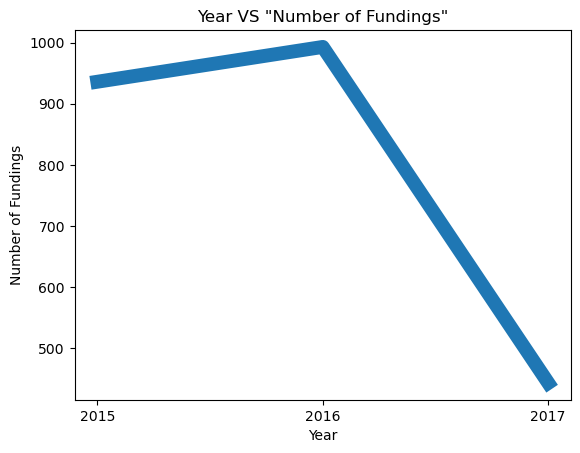

OrderedDict({'2015': 936, '2016': 993, '2017': 443})


In [74]:
import matplotlib.pyplot as plt
import csv
import collections
from datetime import datetime
with open('Datasets/startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj)
    dct = {}
    for row in file_data:
        key = row['Date'][-4:]
        if key in dct:
            dct[key] += 1
        else:
            dct[key] = 1
ord_dict = collections.OrderedDict(sorted(dct.items()))
plt.xlabel("Year")
plt.ylabel("Number of Fundings")
plt.title('Year VS "Number of Fundings"')
plt.plot(list(ord_dict.keys()), list(ord_dict.values()), linewidth = 10)
plt.show()  
print(ord_dict)
                                   

['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Pune', 'Noida', 'Hyderabad', 'Chennai', 'Ahmedabad', 'Jaipur']
[627, 446, 381, 240, 84, 78, 76, 66, 35, 25]


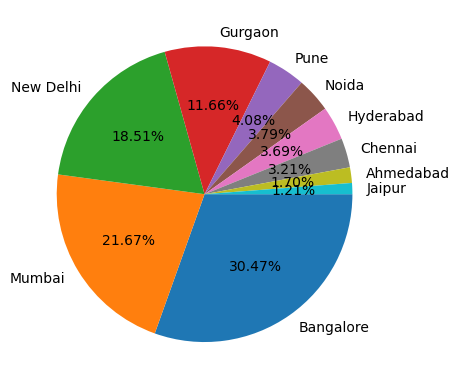

In [70]:
with open('Datasets/startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj)
    dct = {}
    for row in file_data:
        key = row['CityLocation']
        if key in dct:
            dct[key] += 1
        else:
            dct[key] = 1
ord_dict = collections.OrderedDict(sorted(dct.items(),key=lambda item: item[1], reverse = True))
ord_dict = {k: v for k, v in ord_dict.items() if k != ''}
top_ten_name = list(ord_dict)[0:10]
top_ten_values = list(ord_dict.values())[0:10]
print(top_ten_name)
print(top_ten_values)
plt.pie(top_ten_values, counterclock = False, autopct = '%.2f%%', labels = top_ten_name)
plt.xticks(rotation = 10)
plt.show() 

In [83]:
import csv
import collections

def normalize_city_name(city):
    city = city.strip().title()  # Convert to title case
    if "Delhi" in city:
        city = "New Delhi"  
    return city

with open('Datasets/startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj)
    dct = {}
    for row in file_data:
        key = row['CityLocation'].strip() 
        if '/' in key:
            key = key.split('/')[0].strip() 
        
        key = normalize_city_name(key) 
        
        amount = row['AmountInUSD'].replace(',', '')  

        if amount == '' or key == '': 
            continue

        if key in dct:
            dct[key] += float(amount)
        else:
            dct[key] = float(amount)

ord_dict = collections.OrderedDict(sorted(dct.items(), key=lambda item: item[1], reverse=True))
ord_dict = {k: v for k, v in ord_dict.items() if k != ''}
top_ten_name = list(ord_dict.keys())[:10]
top_ten_values = list(ord_dict.values())[:10]
total_top_ten_funding = sum(top_ten_values)
top_ten_percentages = [(value / total_top_ten_funding) * 100 for value in top_ten_values]
for name, percentage in zip(top_ten_name, top_ten_percentages):
    print(f"{name}: {percentage:.2f}%")


Bangalore: 49.71%
New Delhi: 16.63%
Mumbai: 13.90%
Gurgaon: 12.21%
Chennai: 2.43%
Pune: 2.16%
Hyderabad: 1.15%
Noida: 1.01%
Ahmedabad: 0.58%
Jaipur: 0.21%


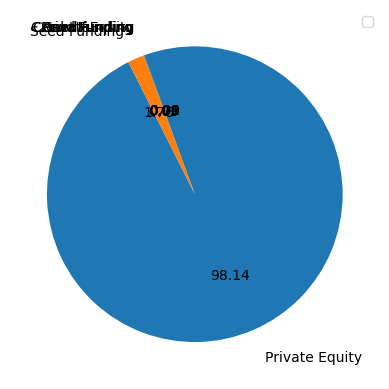

Private Equity 98.14
Seed Funding 1.76
SeedFunding 0.05
Debt Funding 0.04
PrivateEquity 0.01
Crowd funding 0.00
Crowd Funding 0.00


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('Datasets/startup_funding.csv',encoding = 'utf-8')
df['InvestmentType'].replace({'SeedFunding':'Seed Funding'})
df['InvestmentType'].replace({'PrivateEquity':'Private Equity'})
df['InvestmentType'].replace({'DebtFunding':'Debt Funding'})
df['InvestmentType'].replace({'Crowd funding':'Crowd Funding'})
df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))

df = df.groupby('InvestmentType')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:10]
investment = df.index
amount = df.values

plt.pie(amount,labels = investment,autopct='%0.2f',counterclock=False,startangle=110, labeldistance = 1.2)
plt.show()

percent = np.true_divide(amount,amount.sum())*100
for i in range(len(investment)):
    print(investment[i],format(percent[i],'0.2f'))

In [95]:
def normalize_city_name(city):
    city = city.strip().title() 
    if "eCommerce" in city:
        city = "Ecommerce"  
    return city

with open('Datasets/startup_funding.csv') as file_obj:
    file_data = csv.DictReader(file_obj)
    dct = {}
    for row in file_data:
        key = row['IndustryVertical'].strip() 
        
        key = normalize_city_name(key) 
        
        amount = row['AmountInUSD'].replace(',', '')  

        if amount == '' or key == '': 
            continue

        if key in dct:
            dct[key] += float(amount)
        else:
            dct[key] = float(amount)

ord_dict = collections.OrderedDict(sorted(dct.items(), key=lambda item: item[1], reverse=True))
ord_dict = {k: v for k, v in ord_dict.items() if k != ''}
top_ten_name = list(ord_dict.keys())[:5]
top_ten_values = list(ord_dict.values())[:5]
total_top_ten_funding = sum(top_ten_values)
top_ten_percentages = [(value / total_top_ten_funding) * 100 for value in top_ten_values]
for name, percentage in zip(top_ten_name, top_ten_percentages):
    print(f"{name}: {percentage:.2f}%")


Ecommerce: 40.53%
Consumer Internet: 35.95%
Technology: 10.45%
Online Marketplace: 6.63%
E-Commerce & M-Commerce Platform: 6.44%


In [98]:
df = pd.read_csv('Datasets/startup_funding.csv',encoding = 'utf-8')
df['StartupName'].replace({'Oyorooms':'Oyo'})
df['StartupName'].replace({'OyoRooms':'Oyo'})
df['StartupName'].replace({'Oyo Rooms':'Oyo'})
df['StartupName'].replace({'OYO Rooms':'Oyo'})
df['StartupName'].replace({'Olacabs':'Ola'})
df['StartupName'].replace({'Ola Cabs':'Ola'})
df['StartupName'].replace({'Olacabs':'Ola'})
df['StartupName'].replace({'Flipkart.com':'Flipkart'})
df['StartupName'].replace({'Paytm Marketplace':'Paytm'})

df['AmountInUSD'] = df['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
df = df.groupby('StartupName')['AmountInUSD'].sum()
df = df.sort_values(ascending = False)[:5]
startup = df.index
for i in range(5):
    print(startup[i])

Paytm
Flipkart
Ola
Snapdeal
Flipkart.com


In [99]:
df = pd.read_csv('Datasets/startup_funding.csv',encoding = 'utf-8')
df['StartupName'].replace({'Oyorooms':'Oyo'})
df['StartupName'].replace({'OyoRooms':'Oyo'})
df['StartupName'].replace({'Oyo Rooms':'Oyo'})
df['StartupName'].replace({'OYO Rooms':'Oyo'})
df['StartupName'].replace({'Olacabs':'Ola'})
df['StartupName'].replace({'Ola Cabs':'Ola'})
df['StartupName'].replace({'Olacabs':'Ola'})
df['StartupName'].replace({'Flipkart.com':'Flipkart'})
df['StartupName'].replace({'Paytm Marketplace':'Paytm'})
totalfunding = df['StartupName'].value_counts()[:5]
startupname = totalfunding.index
count = totalfunding.values
for i in range(5):
    print(startupname[i],count[i])

Swiggy 7
UrbanClap 6
Medinfi 5
Jugnoo 5
Paytm 5


Sequoia Capital 64
Accel Partners 52
Kalaari Capital 44
Indian Angel Network 40
SAIF Partners 40


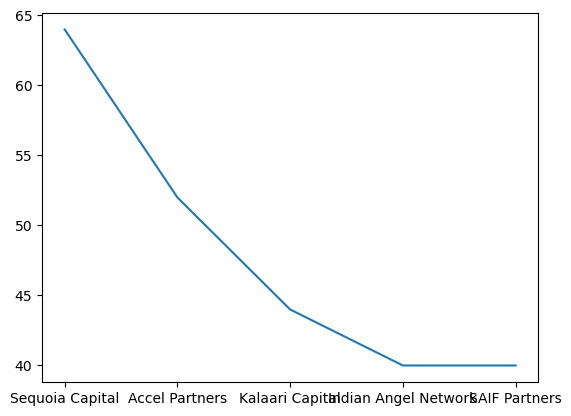

In [121]:
import csv
import matplotlib.pyplot as plt
from collections import Counter
investor_counter = Counter()

# Read the CSV file
with open('Datasets/startup_funding.csv', 'r') as file_obj:
    file_data = csv.DictReader(file_obj)
    
    for row in file_data:
        investors = row['InvestorsName'].split(',')
        
        for investor in investors:
            investor = investor.strip()  # Remove any leading/trailing whitespace
            
            if investor and investor != 'Undisclosed Investors':
                investor_counter[investor] += 1


top_investor = investor_counter.most_common(5)
for investor, count in top_investor:
    print(f"{investor} {count}")
investor_names = [investor for investor, count in top_investor]
investment_counts = [count for investor, count in top_investor]
plt.plot(investor_names, investment_counts)
plt.show()

In [ ]:
import csv
import matplotlib.pyplot as plt
from collections import Counter
investor_counter = Counter()

# Read the CSV file
with open('Datasets/startup_funding.csv', 'r') as file_obj:
    file_data = csv.DictReader(file_obj)
    
    for row in file_data:
        investors = row['InvestorsName'].split(',')
        
        for investor in investors:
            investor = investor.strip()  # Remove any leading/trailing whitespace
            
            if investor and investor != 'Undisclosed Investors':
                investor_counter[investor] += 1


top_investor = investor_counter.most_common(5)
for investor, count in top_investor:
    print(f"{investor} {count}")
investor_names = [investor for investor, count in top_investor]
investment_counts = [count for investor, count in top_investor]
plt.plot(investor_names, investment_counts)
plt.show()